# Problem 1


Q2a - Gender

Values 1: Male 2: Female

Q2b - Age

Values numeric

Q87a - I have felt cheerful and in good spirits [...which is the closest to how you have been feeling over the last two weeks]

Q87b - I have felt calm and relaxed [...which is the closest to how you have been feeling over the last two weeks]

Q87c - I have felt active and vigorous [...which is the closest to how you have been feeling over the last two weeks]

Q87d - I woke up feeling fresh and rested [...which is the closest to how you have been feeling over the last two weeks]

Q87e - My daily life has been filled with things that interest me [...which is the closest to how you have been feeling over the last two weeks]


Values for variables Q87a to Q87e

1. All of the time.
2. Most of the time
3. More than half of the time
4. Less than half of the time
5. Some of the time
6. At no time


Q90a - At my work I feel full of energy [Please tell me how often you feel this way...]

Q90b - I am enthusiastic about my job [Please tell me how often you feel this way...]

Q90c - Time flies when I am working [Please tell me how often you feel this way...]

Q90f - In my opinion, I am good at my job [Please tell me how often you feel this way...]

Values for variables Q90a to Q90f

1. Always.
2. Most of the time
3. Sometimes
4. Rarely
5. Never

In [8]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

#Import data
df = pd.read_csv(r"EWCS_2016.csv", sep=',')
df.head()

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
0,1,63,3,3,3,3,3,2,2,2,2
1,2,58,2,3,2,3,2,2,3,2,2
2,2,32,2,2,3,2,3,2,2,2,2
3,1,35,3,2,2,2,3,2,2,2,2
4,2,27,2,2,3,3,2,2,4,2,2


In [9]:
df[df!= -999]

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
0,1.0,63.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
1,2.0,58.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
2,2.0,32.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0
3,1.0,35.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0
4,2.0,27.0,2.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
7808,1.0,35.0,3.0,2.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0
7809,1.0,53.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
7810,2.0,39.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0
7811,2.0,75.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0


In [10]:
df_ = pd.DataFrame()
df_['Gender'] = df['Q2a']
df_['Age'] = df['Q2b']
df_['Cheerful'] = df['Q87a']
df_['Calm'] = df['Q87b']
df_['Active'] = df['Q87c']
df_['Fresh'] = df['Q87d']
df_['Interest'] = df['Q87e']
df_['Work_energy'] = df['Q90a']
df_['Entusiastic_job'] = df['Q90b']
df_['Time_flies'] = df['Q90c']
df_['Good_at_work'] = df['Q90f']
df_[df_ == -999] = None
df_ = df_.dropna()

In [11]:
df_.describe()

,Gender,Age,Cheerful,Calm,Active,Fresh,Interest,Work_energy,Entusiastic_job,Time_flies,Good_at_work
count,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000
mean,1.490127,43.160194,2.426180,2.606120,2.415065,2.717275,2.407611,2.126324,2.194063,2.175363,1.530535
std,0.499935,12.366371,1.108552,1.222427,1.145142,1.279363,1.188074,0.846588,1.013382,0.969037,0.673537
min,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,34.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,43.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,2.000000,52.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
max,2.000000,87.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
import tarfile
import urllib

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
pca = PCA(n_components=2, svd_solver='full')
scaler = MinMaxScaler().fit(df_)

X = scaler.transform(df_)
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000
mean,0.490127,0.391114,0.285236,0.321224,0.283013,0.343455,0.281522,0.281581,0.298516,0.293841,0.132634
std,0.499935,0.171755,0.221710,0.244485,0.229028,0.255873,0.237615,0.211647,0.253346,0.242259,0.168384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263889,0.200000,0.200000,0.200000,0.200000,0.200000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,0.388889,0.200000,0.200000,0.200000,0.200000,0.200000,0.250000,0.250000,0.250000,0.000000
75%,1.000000,0.513889,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.500000,0.500000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## PCA only analysis

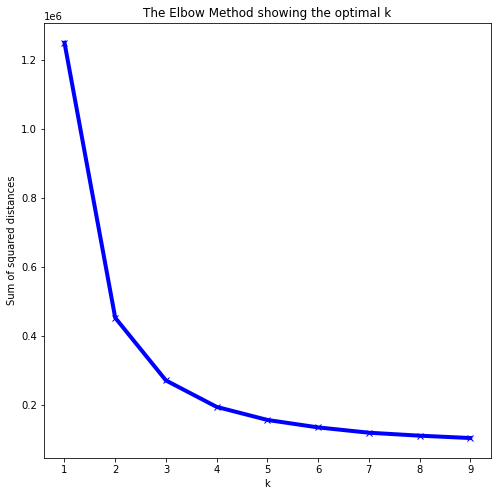

In [14]:


X = pca.fit_transform(X)


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-',linewidth = 4)
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
kmeans_ = KMeans(n_clusters=4,
                init="k-means++",
                    n_init=100,
                           random_state=42)
pca = PCA(n_components=2, random_state = 1)

scaler = MinMaxScaler().fit(df_)
X = scaler.transform(df_)
kmeans_.fit(X)
X = pca.fit_transform(X)


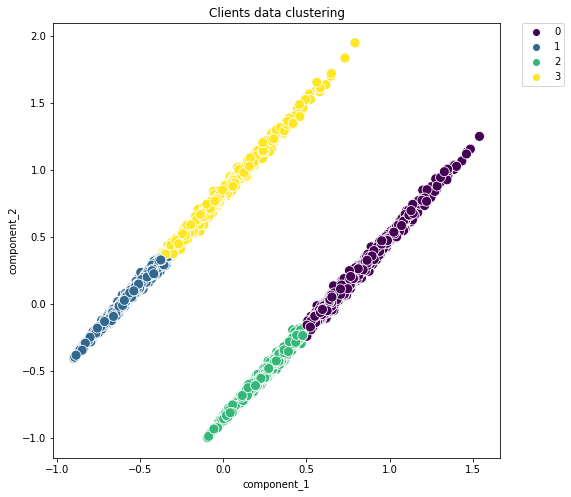

In [16]:
X = pd.DataFrame(X, columns=["component_1", "component_2"])

plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=100,
    data=X,
    hue=kmeans_.labels_,
    palette="viridis",
)
scat.set_title(
    "Clients data clustering"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [17]:
df_['cluster'] = kmeans_.labels_
df_[df_['cluster'] == 0].describe()

,Gender,Age,Cheerful,Calm,Active,Fresh,Interest,Work_energy,Entusiastic_job,Time_flies,Good_at_work,cluster
count,1379.0,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.0
mean,2.0,45.358231,3.485134,3.792603,3.545323,3.995649,3.361856,2.765047,2.800580,2.612763,1.718637,0.0
std,0.0,12.531963,1.088415,1.098450,1.120439,1.124336,1.230489,0.848406,1.036405,1.004784,0.740117,0.0
min,2.0,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,2.0,36.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,0.0
50%,2.0,46.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.0
75%,2.0,54.000000,4.000000,5.000000,4.000000,5.000000,4.000000,3.000000,3.000000,3.000000,2.000000,0.0
max,2.0,87.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,0.0


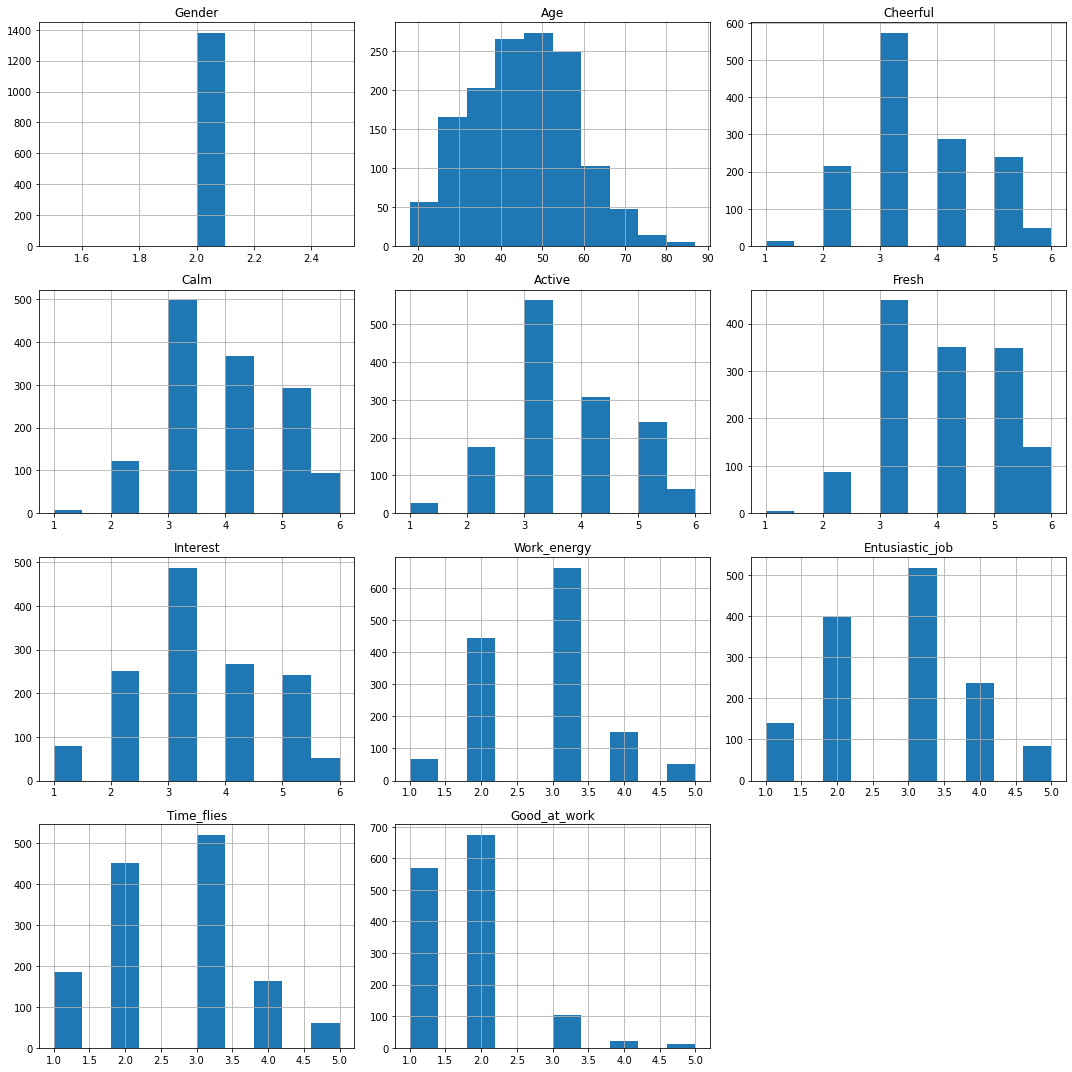

<Figure size 1008x1008 with 0 Axes>

In [18]:

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.figure(figsize=(14, 14))
    plt.show()

draw_histograms(df_.select_dtypes(include=['float64'])[df_['cluster'] == 0], df_.select_dtypes(include=['float64']).columns, 4, 3)

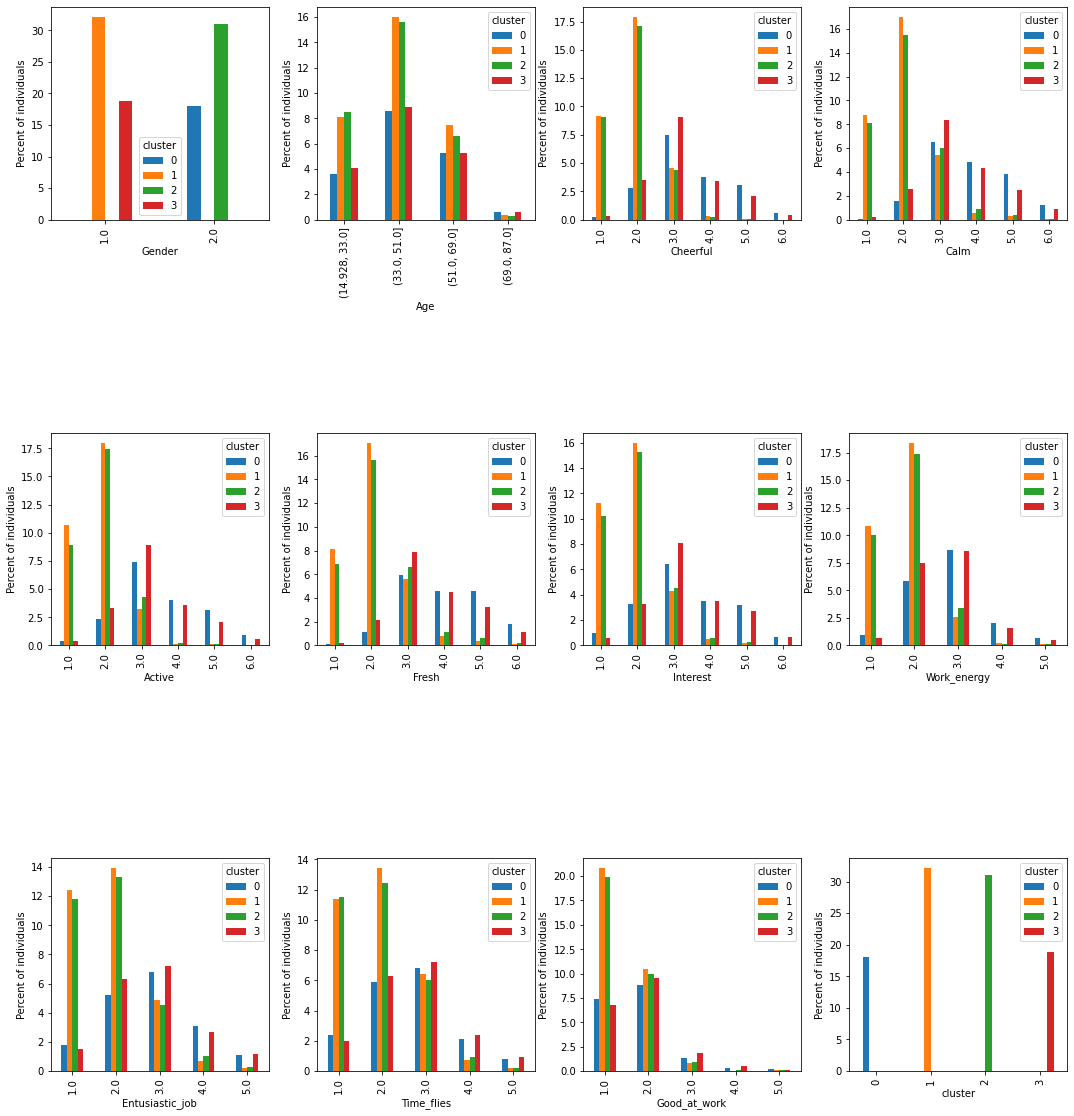

In [19]:
fig, axes = plt.subplots(3, 4, figsize=(16,10))
i = 0
for row in range(3):
    for col in range(4):
        fig.set_figheight(15)
        fig.set_figwidth(15)
        
        if df_.columns[i] == 'Age':
            col_bins = pd.cut(df_['Age'], 4)
            ct = round(pd.crosstab(col_bins, df_.cluster, normalize=True) * 100, 1)
            axes[row, col].set_ylabel('Percent of individuals')
            fig.tight_layout()
            plt.subplots_adjust(left=None, bottom=0.001, right=None, top=None, wspace=None, hspace=1)
            ct.plot.bar(ax=axes[row, col])
            i += 1
            continue
            
        ct = round(pd.crosstab(df_[df_.columns[i]], df_.cluster, normalize=True) * 100, 1)
        axes[row, col].set_ylabel('Percent of individuals')
        ct.plot.bar(ax=axes[row, col])
        i += 1

plt.show()

In [20]:
df_[df_['cluster'] == 1].describe()

,Gender,Age,Cheerful,Calm,Active,Fresh,Interest,Work_energy,Entusiastic_job,Time_flies,Good_at_work,cluster
count,2458.0,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.000000,2458.0
mean,1.0,42.521969,1.882832,1.966233,1.787632,2.024817,1.833605,1.766070,1.834418,1.905614,1.386086,1.0
std,0.0,12.198422,0.696013,0.789687,0.665794,0.835586,0.762081,0.645731,0.817893,0.831831,0.560759,0.0
min,1.0,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,1.0,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,1.0,42.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.0
75%,1.0,51.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0
max,1.0,87.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,1.0


In [21]:
df_[df_['cluster'] == 2].describe()

,Gender,Age,Cheerful,Calm,Active,Fresh,Interest,Work_energy,Entusiastic_job,Time_flies,Good_at_work,cluster
count,2369.0,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.0
mean,2.0,41.634023,1.873786,2.047277,1.880118,2.141410,1.885184,1.800338,1.859434,1.900380,1.398480,2.0
std,0.0,11.892816,0.693619,0.872996,0.693221,0.905041,0.799274,0.651972,0.853300,0.853374,0.590549,0.0
min,2.0,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,2.0,32.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
50%,2.0,41.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.0
75%,2.0,50.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
max,2.0,86.000000,5.000000,6.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,2.0


In [22]:
df_[df_['cluster'] == 3].describe()

,Gender,Age,Cheerful,Calm,Active,Fresh,Interest,Work_energy,Entusiastic_job,Time_flies,Good_at_work,cluster
count,1441.0,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.0
mean,1.0,44.654407,3.247745,3.480916,3.283137,3.621790,3.332408,2.665510,2.777238,2.668980,1.814018,3.0
std,0.0,12.800116,1.009178,1.065796,1.046316,1.093185,1.124777,0.792664,0.994252,0.982875,0.771973,0.0
min,1.0,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0
25%,1.0,35.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.0
50%,1.0,45.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.0
75%,1.0,54.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.0
max,1.0,86.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,3.0


In [23]:
clusters = pd.DataFrame([list(df_[df_['cluster'] == 0].mean()),\
                         list(df_[df_['cluster'] == 1].mean()),\
                         list(df_[df_['cluster'] == 2].mean()),\
                         list(df_[df_['cluster'] == 3].mean())],\
                        columns = df_.columns)
clusters = clusters.sort_values(by='Gender', axis=0)
clusters

,Gender,Age,Cheerful,Calm,Active,Fresh,Interest,Work_energy,Entusiastic_job,Time_flies,Good_at_work,cluster
1,1.0,42.521969,1.882832,1.966233,1.787632,2.024817,1.833605,1.766070,1.834418,1.905614,1.386086,1.0
3,1.0,44.654407,3.247745,3.480916,3.283137,3.621790,3.332408,2.665510,2.777238,2.668980,1.814018,3.0
0,2.0,45.358231,3.485134,3.792603,3.545323,3.995649,3.361856,2.765047,2.800580,2.612763,1.718637,0.0
2,2.0,41.634023,1.873786,2.047277,1.880118,2.141410,1.885184,1.800338,1.859434,1.900380,1.398480,2.0


## Kruskal-Wallis H Test on cluster's means

It is сonducted to check weather cluster's means came from one ditribution. 

Rejecting the null hypothesis would mean that in different clusters, means of features are distributed differently.


In a simplier way - Clusters differ one from each other.

In [24]:
from scipy.stats import kruskal

In [25]:
stat, p = kruskal(list(df_[df_['cluster'] == 0].mean()), list(df_[df_['cluster'] == 1].mean()), list(df_[df_['cluster'] == 2].mean()), list(df_[df_['cluster'] == 3].mean()))
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=12.207, p=0.007
Different distributions (reject H0)


## Problem 2

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -“ secondary education or 4 - higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) 
(binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

In [26]:
mat = pd.read_csv(r"student-mat.csv", sep=';')
mat['Subject'] = np.ones(mat.shape[0])
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1.0


In [27]:
por = pd.read_csv(r"student-por.csv", sep=';')
por['Subject'] = np.zeros(por.shape[0])
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0.0


In [28]:
data = pd.concat([mat,por])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,0.0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,0.0
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,0.0


In [29]:
data.sex = data.sex.apply(lambda x : 0 if x == "F" else 1)
data.school = data.school.apply(lambda x : 0 if x == "GP" else 1)
data.address = data.address.apply(lambda x : 0 if x == "U" else 1)
data.Pstatus = data.Pstatus.apply(lambda x : 0 if x == "A" else 1)
data.famsize = data.famsize.apply(lambda x : 0 if x == "GT3" else 1)
data.schoolsup = data.schoolsup.apply(lambda x : 0 if x == "no" else 1)
data.famsup = data.famsup.apply(lambda x : 0 if x == "no" else 1)
data.paid = data.paid.apply(lambda x : 0 if x == "no" else 1)
data.activities = data.activities.apply(lambda x : 0 if x == "no" else 1)
data.nursery = data.nursery.apply(lambda x : 0 if x == "no" else 1)
data.higher = data.higher.apply(lambda x : 0 if x == "no" else 1)
data.internet = data.internet.apply(lambda x : 0 if x == "no" else 1)
data.romantic = data.romantic.apply(lambda x : 0 if x == "no" else 1)

In [30]:
data.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.260536,0.433908,16.726054,0.272989,0.293103,0.884100,2.603448,2.387931,1.522989,1.970307,...,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,0.378352
std,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,0.731727,0.834353,...,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,0.485209
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


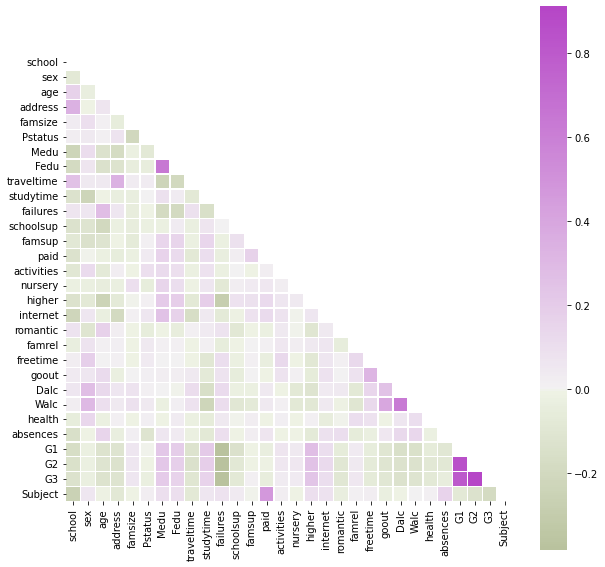

In [31]:
plt.figure(figsize=(10,10))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 300, as_cmap=True)
sns.heatmap(corr, mask=mask, center=0, cmap=cmap, square=True, linewidths=0.5, annot=False)
plt.show()

In [32]:
data_ = pd.get_dummies(data.drop(['G1', 'G2', 'Dalc', 'Fedu', 'higher'], axis=1))

In [33]:
data_

,school,sex,age,address,famsize,Pstatus,Medu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,0,0,4,2,2,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,0,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,1,1,1,1,2,3,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,0,1,4,1,3,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,0,1,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,1,3,1,...,1,0,0,1,0,0,0,0,1,0
645,1,0,18,0,1,1,3,1,2,0,...,0,1,0,1,0,0,0,0,1,0
646,1,0,18,0,0,1,1,2,2,0,...,1,0,0,1,0,0,0,0,1,0
647,1,1,17,0,1,1,3,2,1,0,...,0,1,0,1,0,0,0,0,1,0


In [34]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='neg_root_mean_squared_error')
    
    print('CV Mean: ', round(-np.mean(scores), 2))
    print('STD: ', round(np.std(scores), 2))
    print('\n')
    
def scale(X):
    for col in X.columns:
        a = np.array(X[col].values)  
        a = (a - np.mean(a))/np.std(a)
        X[col] = a
    return X

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [36]:


#Divide into X and y

y = data_['G3']
X = data_.drop(['G3'], axis=1)


# scaler = MinMaxScaler().fit(X)
# X = scaler.transform(X)

X = scale(X)
#Divide into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#Initialize model
ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
lr = LinearRegression().fit(X_train, y_train)

print(ols.summary())

res_base = round(pd.Series(ols.predict(sm.add_constant(X_test))),0)

print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, res_base),2), '\n')
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, res_base),2), '\n')
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, res_base)),2))

get_cv_scores(lr)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     9.921
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.49e-45
Time:                        19:58:30   Log-Likelihood:                -2449.8
No. Observations:                 939   AIC:                             4976.
Df Residuals:                     901   BIC:                             5160.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.3538      0.11

In [37]:
to_drop = [ 'sex', 'age', 'address',\
           'famsize', 'Pstatus', 'Medu',\
            'traveltime', 'famsup','paid',\
           'activities', 'nursery', 'internet',\
            'freetime', 'goout', 'Walc',\
            'health', 'absences']

y = data_['G3']
X = data_.drop('G3', axis=1)


# scaler = MinMaxScaler().fit(X)
# X = scaler.transform(X)

#Divide into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


ols_new = sm.OLS(y_train, sm.add_constant(X_train.drop(to_drop, axis=1))).fit()
res_del = round(pd.Series(ols_new.predict(sm.add_constant(X_test.drop(to_drop, axis=1)))), 0)
lr_new = LinearRegression().fit(X_train.drop(to_drop, axis=1), y_train)

print(ols_new.summary())
print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, res_del), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, res_del),2), '\n')
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, res_del)),2))
get_cv_scores(lr_new)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     16.68
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.15e-49
Time:                        19:58:30   Log-Likelihood:                -2464.7
No. Observations:                 939   AIC:                             4971.
Df Residuals:                     918   BIC:                             5073.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.1182      0.31

In [38]:
to_drop_ = [ 'sex', 'age', 'address',\
           'famsize', 'Pstatus', 'Medu',\
            'traveltime', 'famsup','paid',\
           'activities', 'nursery', 'internet',\
            'freetime', 'goout', 'Walc',\
            'health', 'absences', 'famrel',\
            'Mjob_at_home', 'Fjob_health',\
           'Mjob_other', 'Fjob_at_home', 'Fjob_other',\
           'Fjob_services']

ols_new = sm.OLS(y_train, sm.add_constant(X_train.drop(to_drop_, axis=1))).fit()
res_del = round(ols_new.predict(sm.add_constant(X_test.drop(to_drop_, axis=1))),0)

lr_new = LinearRegression().fit(X_train.drop(to_drop_, axis=1), y_train)

print(ols_new.summary())
print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, res_del), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, res_del),2), '\n')
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, res_del)),2))
get_cv_scores(lr_new)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     21.99
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.22e-51
Time:                        19:58:30   Log-Likelihood:                -2466.8
No. Observations:                 939   AIC:                             4966.
Df Residuals:                     923   BIC:                             5043.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.5463      0.25

### Ridge regression

In [39]:
from sklearn.linear_model import RidgeCV


alpha_range = 10.**np.arange(-2, 3)

ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train.drop(to_drop_, axis=1), y_train)
ridgeregcv.alpha_

0.1

In [40]:
from sklearn.linear_model import Ridge


ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred_ridge = round(pd.Series(ridgereg.predict(X_test)),0)
print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, y_pred_ridge), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, y_pred_ridge),2))
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)),2))
print(ridgereg.coef_)
for i, j in enumerate(ridgereg.coef_):
    if (j < 0.05 and j > -0.05):
        print(X_train.columns[i])


 Mean square error of the model is 11.58
Mean_absolute_error of the model is 2.53
Root_mean_squared_error :  3.4
[-0.70387817 -0.09689559 -0.05581714 -0.41312629  0.41354876 -0.11258218
  0.200246   -0.09925914  0.42159082 -1.60811752 -1.26063732 -0.32108644
  0.03557467 -0.02930672 -0.01580289  0.22593222 -0.65629612  0.23543213
  0.02804045 -0.19597673 -0.11184045 -0.16282451  0.01330402 -1.72127974
 -0.30179872  0.9427256  -0.36773919  0.34141098  0.02906123  0.09405072
  0.00763879 -0.0755399  -0.28757685  1.22592786 -0.07462158 -0.11977755
 -0.13876672  0.28519524  0.13927273 -0.17891588  0.19624524]
paid
activities
nursery
freetime
absences
Mjob_teacher
Fjob_health


### Lasso regression

In [41]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
print('alpha : ',lassoregcv.alpha_)
y_pred_lasso = round(pd.Series(lassoregcv.predict(X_test)), 0)

print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, y_pred_lasso), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, y_pred_lasso),2))
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),2))
get_cv_scores(lassoregcv)

alpha :  0.002656369408439987

 Mean square error of the model is 11.5
Mean_absolute_error of the model is 2.53
Root_mean_squared_error :  3.39
CV Mean:  3.4
STD:  0.21




In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit
!pip install scikit-learn

In [43]:
columns = []
rfe = RFE (lassoregcv,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
for i, j in enumerate(X_train.columns):
    if rfe.support_[i]:
        columns.append(j)
columns

[ True False False  True False False False False False  True  True False
 False False False False  True False False False False False False  True
 False  True False  True False False False False False  True False False
 False  True False False False]
[ 1 24 23  1  3 15  6 16  2  1  1  5 31 19 18  7  1  9 30  8 14 13 17  1
 12  1 11  1 27 28 29 25 10  1 20 21 22  1 26  4 32]


['school',
 'address',
 'failures',
 'schoolsup',
 'romantic',
 'Subject',
 'Mjob_health',
 'Mjob_services',
 'Fjob_teacher',
 'reason_reputation']

In [44]:
lassoregcv.fit(X_train[columns], y_train)

y_pred_lasso = round(pd.Series(lassoregcv.predict(X_test[columns])), 0)

print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, y_pred_lasso), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, y_pred_lasso),2))
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),2))
get_cv_scores(lassoregcv)


 Mean square error of the model is 11.88
Mean_absolute_error of the model is 2.62
Root_mean_squared_error :  3.45
CV Mean:  3.4
STD:  0.21




In [45]:
res = list(round(ols_new.predict(sm.add_constant(X_test.drop(to_drop_, axis=1))),0).astype(int))
res_ = list(round(ols.predict(sm.add_constant(X_test)),0).astype(int))

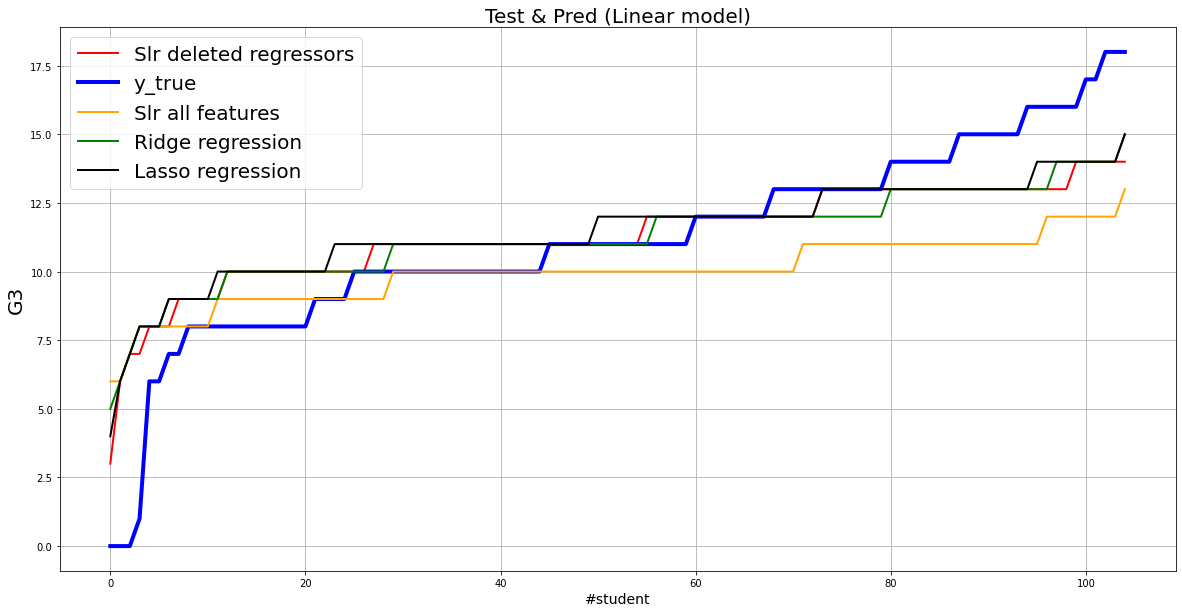

In [46]:
plt.figure(figsize=(20,10))
plt.plot(range(0, y_test.shape[0]), sorted(res), color='red', linewidth =2, label = 'Slr deleted regressors')
plt.plot(range(0, y_test.shape[0]), sorted(list(y_test)), color='blue', linewidth =4, label ='y_true')
plt.plot(range(0, y_test.shape[0]), sorted(res_), color='orange', linewidth =2, label ='Slr all features')
plt.plot(range(0, y_test.shape[0]), sorted(y_pred_ridge), color='green', linewidth =2, label ='Ridge regression')
plt.plot(range(0, y_test.shape[0]), sorted(y_pred_lasso), color='black', linewidth =2, label ='Lasso regression')

plt.title('Test & Pred (Linear model)', fontsize=20)
plt.xlabel('#student', fontsize=14)
plt.ylabel('G3', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

### Random Forests and Boosting

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [49]:


regr = RandomForestRegressor(max_depth=11, min_samples_leaf=2, min_samples_split=4)


parametrs = { 'n_estimators': range(110, 130, 5),
            'max_depth': range(1, 13, 2),
            'min_samples_leaf': range(1, 8),
            'min_samples_split': range(2, 10, 2)
}


grid_clf = GridSearchCV(regr, parametrs, n_jobs=-1, cv=8)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=RandomForestRegressor(max_depth=11, min_samples_leaf=2,
                                             min_samples_split=4),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(110, 130, 5)})

In [50]:
grid_clf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 125}

In [51]:
regr = RandomForestRegressor(max_depth=11, min_samples_leaf=1, min_samples_split=8, n_estimators=125)

regr.fit(X_train, y_train)

res_RF = round(pd.Series(regr.predict(X_test)),0)


print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, res_RF), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, res_RF),2))
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, res_RF)),2))

get_cv_scores(regr)


 Mean square error of the model is 10.7
Mean_absolute_error of the model is 2.34
Root_mean_squared_error :  3.27
CV Mean:  3.18
STD:  0.11




In [52]:
import xgboost as xg

In [53]:
xgb_r = xg.XGBRegressor(learning_rate=0.1, min_child_weight =1,\
                        max_depth=5, gamma=0, n_estimators = 74,\
                        colsample_bytree =0.7, subsample = 0.4, reg_alpha=0.01)

parametrs = {'gamma':[i/10.0 for i in range(0,5)],
            'subsample':[i/10.0 for i in range(6,10)],
             'colsample_bytree':[i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
            }


grid_xgb_r = GridSearchCV(xgb_r, parametrs, n_jobs = -1, cv=5)
grid_xgb_r.fit(X_train, y_train)

xgb_r.fit(X_train, y_train)
grid_xgb_r.best_params_

[20:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'colsample_bytree': 0.7, 'gamma': 0.0, 'reg_alpha': 0.01, 'subsample': 0.9}

In [54]:
xgb_r = xg.XGBRegressor(learning_rate=0.1, min_child_weight =1,\
                        max_depth=5, gamma=0.4, n_estimators = 74,\
                        colsample_bytree =0.6, subsample = 0.9, reg_alpha=0.01)
xgb_r.fit(X_train, y_train)

res_XG = round(pd.Series(xgb_r.predict(X_test)),0)


print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, res_XG), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, res_XG),2))
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, res_XG)),2))

get_cv_scores(xgb_r)

[20:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Mean square error of the model is 9.46
Mean_absolute_error of the model is 2.28
Root_mean_squared_error :  3.08
[20:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CV Mean:  3.05
STD:  0.14




#### With droped

In [55]:
xgb_r = xg.XGBRegressor(learning_rate=0.1, min_child_weight =1,\
                        max_depth=5, gamma=0, n_estimators = 74,\
                        colsample_bytree =0.7, subsample = 0.4, reg_alpha=0.01)
xgb_r.fit(X_train, y_train)

res_XG = round(pd.Series(xgb_r.predict(X_test)),0)

print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, res_XG), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, res_XG),2))
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, res_XG)),2))
get_cv_scores(xgb_r)

[20:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Mean square error of the model is 10.38
Mean_absolute_error of the model is 2.34
Root_mean_squared_error :  3.22
[20:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CV Mean:  3.11
STD:  0.11




<Figure size 1440x720 with 0 Axes>

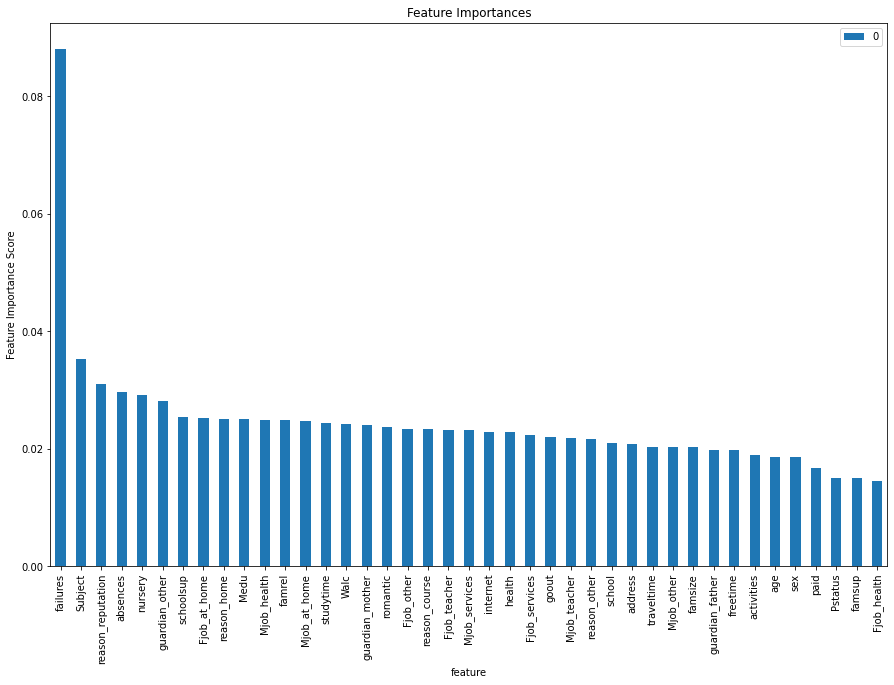

In [56]:
feat_imp = pd.Series(xgb_r.feature_importances_).sort_values(ascending=False)
feat_imp_df = pd.DataFrame(feat_imp)
feat_imp_df.reset_index(level=0, inplace=True)
features = []
for i in feat_imp_df['index'].values:
    features.append(X_train.columns[i])
feat_imp_df['feature'] = features
feat_imp_df = feat_imp_df.drop('index', axis = 1)
feat_imp_df = feat_imp_df.set_index('feature')
plt.figure(figsize=(20,10))
feat_imp_df.plot(kind='bar', title='Feature Importances', figsize=(15,10))
plt.ylabel('Feature Importance Score')
plt.show()

<Figure size 1440x720 with 0 Axes>

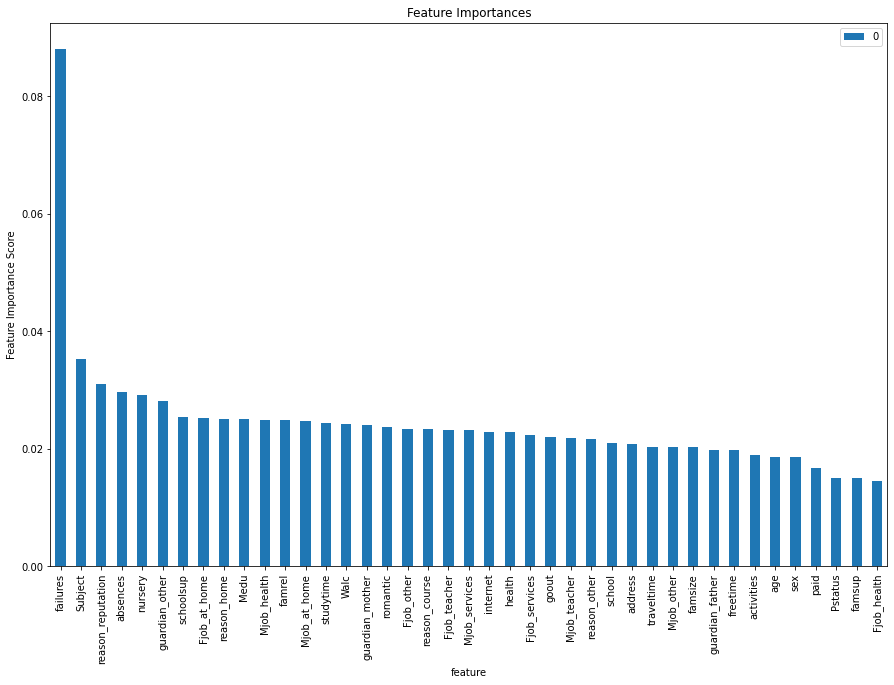

In [57]:
plt.figure(figsize=(20,10))
feat_imp_df.plot(kind='bar', title='Feature Importances', figsize=(15,10))
plt.ylabel('Feature Importance Score')
plt.show()

In [58]:
from sklearn.svm import SVR

In [59]:
svm = SVR(kernel ='rbf', C = 13)
svm.fit(X_train, y_train)

res_svm = round(pd.Series(svm.predict(X_test)),0)

print('\n','Mean square error of the model is',\
      round(metrics.mean_squared_error(y_test, res_svm), 2))
print ("Mean_absolute_error of the model is",\
       round(metrics.mean_absolute_error(y_test, res_svm),2))
print ("Root_mean_squared_error : ",\
       round(np.sqrt(metrics.mean_squared_error(y_test, res_svm)),2))
get_cv_scores(svm)


 Mean square error of the model is 11.26
Mean_absolute_error of the model is 2.44
Root_mean_squared_error :  3.36
CV Mean:  3.45
STD:  0.27




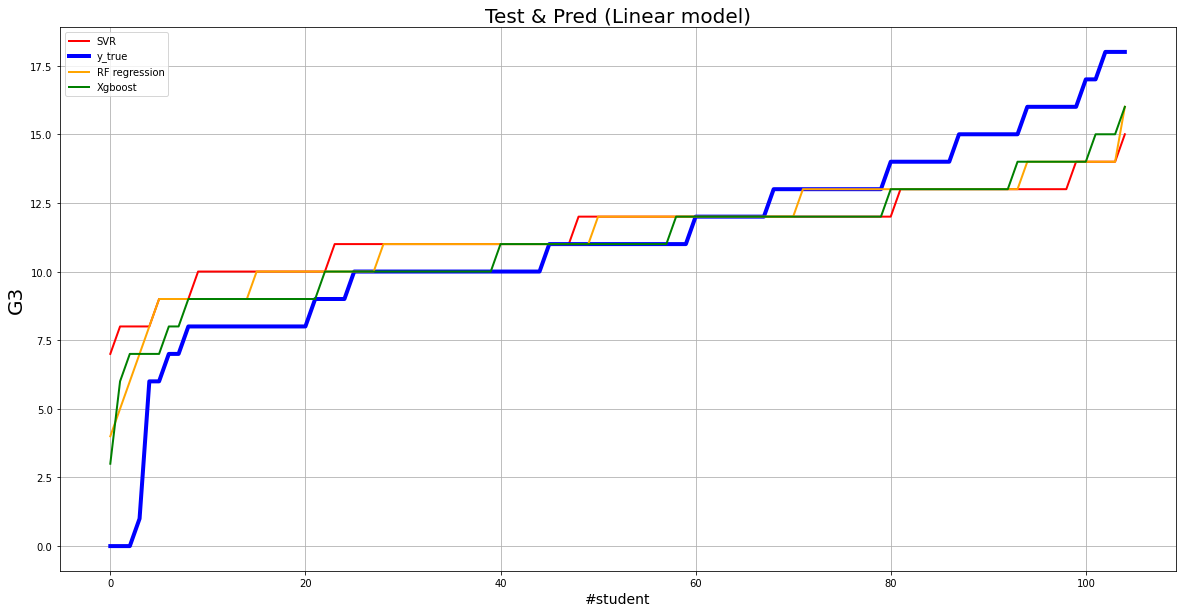

In [60]:
plt.figure(figsize=(20,10))
plt.plot(range(0, y_test.shape[0]), sorted(res_svm), color='red', linewidth =2, label = 'SVR')
plt.plot(range(0, y_test.shape[0]), sorted(list(y_test)), color='blue', linewidth =4, label ='y_true')
plt.plot(range(0, y_test.shape[0]), sorted(res_RF), color='orange', linewidth =2, label ='RF regression')
plt.plot(range(0, y_test.shape[0]), sorted(res_XG), color='green', linewidth =2, label ='Xgboost')

plt.title('Test & Pred (Linear model)', fontsize=20)
plt.xlabel('#student', fontsize=14)
plt.ylabel('G3', fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

## Problem 3

1.  age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown') related with the last contact of the current campaign:
8.  contact: contact communication type (categorical: 'cellular','telephone')
9.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  other attributes:
12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  previous: number of contacts performed before this campaign and for this client (numeric)
15.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  social and economic context attributes
16.  emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.  cons.price.idx: consumer price index - monthly indicator (numeric)
18.  cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19.  euribor3m: euribor 3 month rate - daily indicator (numeric)
20.  nr.employed: number of employees - quarterly indicator (numeric) Output variable (desired target):
21.  y - has the client subscribed a term deposit? (binary: 'yes','no')

In [61]:
df = pd.read_csv(r"bank.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [62]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [63]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


In [64]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977


In [65]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021


In [66]:
def month(element):

    return {
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
    }[element]

In [67]:
df.default = df.default.apply(lambda x : 0 if x == "no" else 1)
df.housing = df.housing.apply(lambda x : 0 if x == "no" else 1)
df.loan = df.loan.apply(lambda x : 0 if x == "no" else 1)
df.y = df.y.apply(lambda x : 0 if x == "no" else 1)
df.month = df.month.apply(lambda x : month(x))

In [68]:
df.drop('pdays', axis =1).describe()

,age,default,balance,housing,loan,day,month,duration,campaign,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,6.166777,263.961292,2.793630,0.542579,0.115240
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,2.378380,259.856633,3.109807,1.693562,0.319347
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,5.000000,104.000000,1.000000,0.000000,0.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,6.000000,185.000000,2.000000,0.000000,0.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,8.000000,329.000000,3.000000,0.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,12.000000,3025.000000,50.000000,25.000000,1.000000


In [69]:
lower_q = df.quantile(0.01)
upper_q = df.quantile(0.99)
idx = ((lower_q > df) | (df > upper_q)).any(axis=1)
df = df[~idx]
df.drop('pdays', axis =1).describe()

,age,default,balance,housing,loan,day,month,duration,campaign,previous,y
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,40.985669,0.015788,1218.099587,0.568861,0.154967,15.958465,6.121933,251.980325,2.609424,0.426524,0.101044
std,9.823592,0.124670,2019.558330,0.495296,0.361917,8.188823,2.346699,217.521473,2.294094,1.207869,0.301424
min,24.000000,0.000000,-665.000000,0.000000,0.000000,2.000000,1.000000,11.000000,1.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,5.000000,105.000000,1.000000,0.000000,0.000000
50%,39.000000,0.000000,435.000000,1.000000,0.000000,16.000000,6.000000,184.000000,2.000000,0.000000,0.000000
75%,48.000000,0.000000,1416.000000,1.000000,0.000000,21.000000,8.000000,323.000000,3.000000,0.000000,0.000000
max,72.000000,1.000000,14093.000000,1.000000,1.000000,31.000000,11.000000,1259.000000,16.000000,8.000000,1.000000


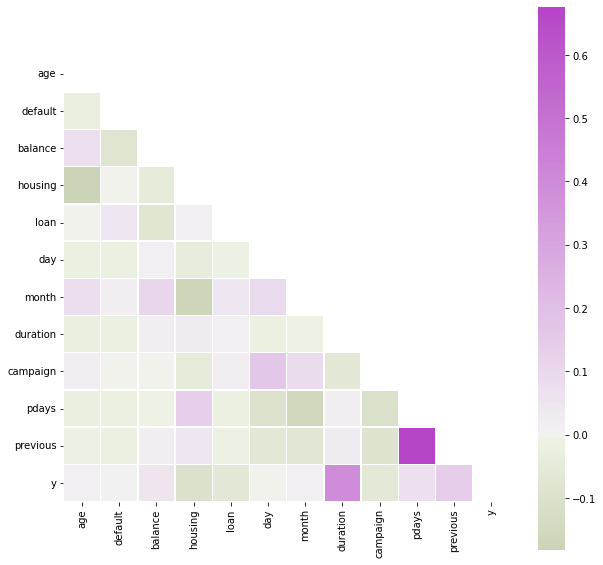

In [70]:

plt.figure(figsize=(10,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 300, as_cmap=True)
sns.heatmap(corr, mask=mask, center=0, cmap=cmap, square=True, linewidths=0.5, annot=False)
plt.show()

In [71]:
df = df.drop('pdays', axis=1)
df = pd.get_dummies(df)
df

,age,default,balance,housing,loan,day,month,duration,campaign,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,10,79,1,0,...,0,0,0,1,0,0,0,0,0,1
1,33,0,4789,1,1,11,5,220,1,4,...,1,0,0,1,0,0,1,0,0,0
2,35,0,1350,1,0,16,4,185,1,1,...,0,1,0,1,0,0,1,0,0,0
3,30,0,1476,1,1,3,6,199,4,0,...,0,1,0,0,0,1,0,0,0,1
4,59,0,0,1,0,5,5,226,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,0,473,1,0,7,7,624,5,0,...,1,0,0,1,0,0,0,0,0,1
4516,33,0,-333,1,0,30,7,329,5,0,...,1,0,0,1,0,0,0,0,0,1
4518,57,0,295,0,0,19,8,151,11,0,...,1,0,0,1,0,0,0,0,0,1
4519,28,0,1137,0,0,6,2,129,4,3,...,1,0,0,1,0,0,0,1,0,0


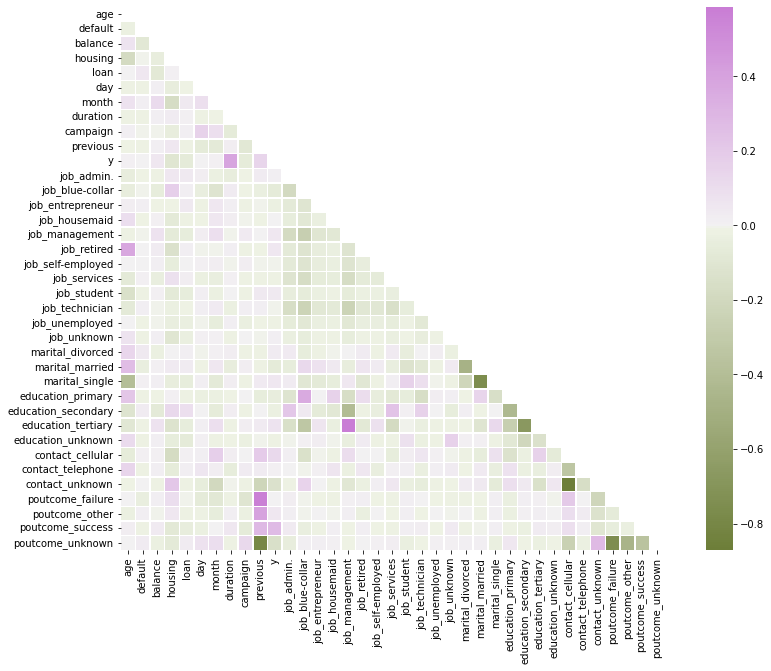

In [72]:
plt.figure(figsize=(15,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(100, 300, as_cmap=True)
sns.heatmap(corr, mask=mask, center=0, cmap=cmap, square=True, linewidths=0.5, annot=False)
plt.show()

### SMOTE

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit

In [74]:
y_train.describe()

count    939.000000
mean      11.363152
std        3.901665
min        0.000000
25%       10.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [75]:
y_test.describe()

count    105.000000
mean      11.152381
std        3.529494
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       18.000000
Name: G3, dtype: float64

In [76]:
X = df.drop('y', axis=1)
y = df['y']

columns = X.columns

smote = SMOTE(random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)



smote_X, smote_y = smote.fit_resample(X_train, y_train)

smote_X_df = pd.DataFrame(data=smote_X,columns=columns )
smote_y_df= pd.DataFrame(data=smote_y,columns=['y'])


print("Ratio of 0 ",len(smote_y_df[smote_y_df['y']==0])/len(smote_X_df))
print("ratio of 1",len(smote_y_df[smote_y_df['y']==1])/len(smote_X_df))
smote_X_df

Ratio of 0  0.5
ratio of 1 0.5


,age,default,balance,housing,loan,day,month,duration,campaign,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,45,0,-206,1,0,6,5,337,2,0,...,0,1,0,1,0,0,0,0,0,1
1,43,0,738,1,0,21,11,585,4,4,...,1,0,0,1,0,0,1,0,0,0
2,30,0,6619,1,0,21,8,239,8,0,...,0,1,0,1,0,0,0,0,0,1
3,59,0,975,1,0,15,5,263,4,0,...,1,0,0,0,0,1,0,0,0,1
4,47,0,0,1,0,21,7,676,1,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,42,0,508,0,0,4,5,154,2,1,...,0,1,0,1,0,0,0,0,0,0
5946,41,0,-272,1,0,20,5,1109,2,3,...,0,0,0,0,0,0,0,0,0,0
5947,36,0,1314,0,0,29,5,225,1,0,...,0,1,0,1,0,0,0,0,0,0
5948,37,0,1150,0,0,4,8,313,1,1,...,0,1,0,0,0,0,0,0,0,0


### RFE

In [78]:
columns = []
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=30)
rfe = rfe.fit(smote_X_df, smote_y_df.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
for i, j in enumerate(smote_X_df.columns):
    if rfe.support_[i]:
        columns.append(j)
columns

[False False False  True  True False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[3 2 7 1 1 4 6 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


['housing',
 'loan',
 'campaign',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

### Logit model

In [79]:
X_ = smote_X_df[columns]
y_ = smote_y_df

logit = sm.Logit(y_,X_)
res = logit.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.359717
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5950
Model:                          Logit   Df Residuals:                     5920
Method:                           MLE   Df Model:                           29
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.4810
Time:                        20:38:42   Log-Likelihood:                -2140.3
converged:                       True   LL-Null:                       -4124.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
housing                -0.3938      0.088     -4.480      0.000      -0.566      -0.222
lo

In [80]:
columns.pop(columns.index('contact_unknown'))
columns.pop(columns.index('marital_divorced'))
columns.pop(columns.index('marital_married'))
columns.pop(columns.index('marital_single'))

X_ = smote_X_df[columns]
y_ = smote_y_df

logit = sm.Logit(y_,X_)
res = logit.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.360059
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5950
Model:                          Logit   Df Residuals:                     5924
Method:                           MLE   Df Model:                           25
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.4805
Time:                        20:38:46   Log-Likelihood:                -2142.4
converged:                       True   LL-Null:                       -4124.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
housing                -0.4231      0.086     -4.922      0.000      -0.592      -0.255
lo

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### CV train

In [82]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(C = 119, penalty='l2')
logreg.fit(smote_X_df, smote_y_df)

logreg_cv_ = LogisticRegressionCV(cv=5, random_state=42, Cs=119).fit(smote_X_df, smote_y_df)
logreg_cv_f1_ = LogisticRegressionCV(cv=5, random_state=42, Cs=119, scoring='f1').fit(smote_X_df, smote_y_df)


y_proba = logreg.predict_proba(X_test)

y_pred = logreg_cv_.predict(X_test)
print('Accuracy CV {:.2f}'.format(logreg_cv_.score(X_test, y_test)))
print('F1 score CV {:.2f}'.format(logreg_cv_f1_.score(X_test, y_test)))


print(classification_report(y_test, y_pred))

Accuracy CV 0.89
F1 score CV 0.49
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       726
           1       0.55      0.34      0.42        98

    accuracy                           0.89       824
   macro avg       0.73      0.65      0.68       824
weighted avg       0.87      0.89      0.88       824



Text(0.5, 1.0, 'LR SMOTE')

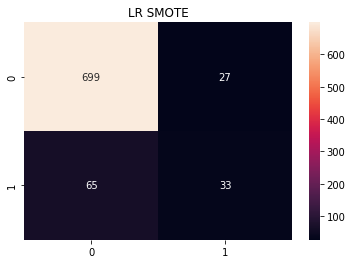

In [83]:
cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
categories = ['Zero', 'One']
sns.heatmap(cf_matrix, annot=True, fmt='').set_title('LR SMOTE')

In [87]:
thresh = np.arange(0.05,1,0.05)
thresh_res = []
for thr in thresh:
    func = np.vectorize(lambda x: 1 if x > thr else 0)
    y_pred = func(y_proba[:,1])
    thresh_res.append(roc_auc_score(y_test, y_pred))
print('optimal Threshold is ', round(thresh[np.argmax(thresh_res)],2))

func = np.vectorize(lambda x: 1 if x > 0.45 else 0)
y_pred = func(y_proba[:,1])
print('F1 score is ', metrics.f1_score(y_test, y_pred))

optimal Threshold is  0.45
F1 score is  0.5176470588235293


### CV test 

In [88]:
cv_scores_accuracy = cross_val_score(logreg, X_test, y_test, cv=5)
cv_scores_f1 = cross_val_score(logreg, X_test, y_test, cv=5, scoring ='f1')


y_pred = logreg_cv_.predict(X_test)

print('Accuracy CV {:.2f}'.format(cv_scores_accuracy.mean()))
print('F1 score CV {:.2f}'.format(cv_scores_f1.mean()))

print(classification_report(y_test, y_pred))

Accuracy CV 0.88
F1 score CV 0.29
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       726
           1       0.55      0.34      0.42        98

    accuracy                           0.89       824
   macro avg       0.73      0.65      0.68       824
weighted avg       0.87      0.89      0.88       824



Text(0.5, 1.0, 'LR SMOTE')

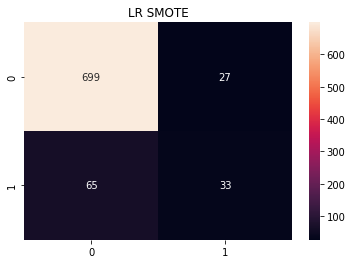

In [89]:
cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
categories = ['Zero', 'One']
sns.heatmap(cf_matrix, annot=True, fmt='').set_title('LR SMOTE')

### Without SMOTE CV test

In [90]:
logreg_cv = LogisticRegressionCV(cv=5, random_state=42, Cs=119).fit(X_train, y_train)
logreg_cv_f1 = LogisticRegressionCV(cv=5, random_state=42, Cs=119, scoring='f1').fit(X_train, y_train)


y_pred = logreg_cv.predict(X_test)
print('Accuracy CV {:.2f}'.format(logreg_cv.score(X_test, y_test)))
print('F1 score CV {:.2f}'.format(logreg_cv_f1.score(X_test, y_test)))


print(classification_report(y_test, y_pred))
logit_roc_auc = roc_auc_score(y_test, logreg_cv_f1.predict(X_test))
logit_roc_auc

Accuracy CV 0.90
F1 score CV 0.36
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       726
           1       0.69      0.24      0.36        98

    accuracy                           0.90       824
   macro avg       0.80      0.61      0.65       824
weighted avg       0.88      0.90      0.87       824



0.6148732220160792

Text(0.5, 1.0, 'LR')

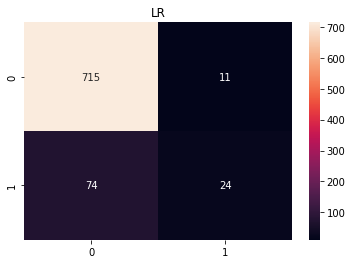

In [91]:
cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
categories = ['Zero', 'One']
sns.heatmap(cf_matrix, annot=True, fmt='').set_title('LR')

### RFE

In [92]:
logreg_cv = LogisticRegressionCV(cv=5, random_state=42, Cs=119).fit(smote_X_df[columns], smote_y_df)
logreg_cv_f1 = LogisticRegressionCV(cv=5, random_state=42, Cs=119, scoring='f1').fit(smote_X_df[columns], smote_y_df)

y_pred = logreg_cv.predict(X_test[columns])
print('Accuracy CV{:.2f}'.format(logreg_cv.score(X_test[columns], y_test)))
print('F1 score CV{:.2f}'.format(logreg_cv_f1.score(X_test[columns], y_test)))

print(classification_report(y_test, y_pred))
logit_roc_auc = roc_auc_score(y_test, logreg_cv_f1.predict(X_test[columns]))
logit_roc_auc

Accuracy CV0.90
F1 score CV0.33
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       726
           1       0.70      0.21      0.33        98

    accuracy                           0.90       824
   macro avg       0.80      0.60      0.64       824
weighted avg       0.88      0.90      0.87       824



0.600944510035419

Text(0.5, 1.0, 'LR SMOTE RFE')

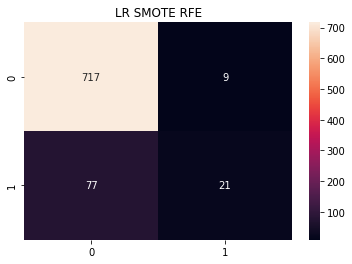

In [93]:
cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
categories = ['Zero', 'One']
sns.heatmap(cf_matrix, annot=True, fmt='').set_title('LR SMOTE RFE')

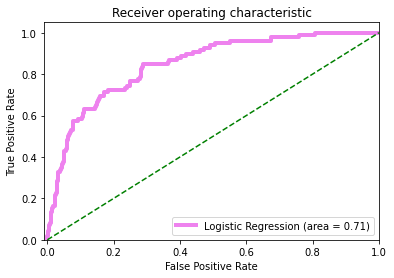

In [94]:
logit_roc_auc = roc_auc_score(y_test, logreg_cv_f1_.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv_f1_.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, linewidth =4, c = 'violet')
plt.plot([0, 1], [0, 1],'r--', c ='g')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [95]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

### KNN

In [96]:
KNN = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', algorithm = 'auto', p =1)

parametrs = {'n_neighbors': range(2, 10, 1),
            }


KNN_drid = GridSearchCV(KNN, parametrs, n_jobs = -1, cv=5, scoring='f1')
KNN_drid.fit(smote_X_df, smote_y_df)

KNN.fit(smote_X_df, smote_y_df)
KNN_drid.best_params_

{'n_neighbors': 2}

In [97]:
KNN = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', algorithm = 'auto', p =1)
KNN.fit(smote_X_df, smote_y_df)


cv_scores_f1 = cross_val_score(KNN, X_test, y_test, cv=5, scoring='f1')
cv_scores_accuracy = cross_val_score(KNN, X_test, y_test, cv=5)


y_pred = KNN.predict(X_test)


print('Accuracy CV{:.2f}'.format(cv_scores_accuracy.mean()))
print('F1 score CV {:.2f}'.format(cv_scores_f1.mean()))

print(classification_report(y_test, y_pred))

Accuracy CV0.80
F1 score CV 0.12
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       726
           1       0.21      0.38      0.27        98

    accuracy                           0.75       824
   macro avg       0.56      0.59      0.56       824
weighted avg       0.82      0.75      0.78       824



In [98]:
y_proba = KNN.predict_proba(X_test)

thresh = np.arange(0.05,1,0.05)
thresh_res = []
for thr in thresholds:
    func = np.vectorize(lambda x: 1 if x > thr else 0)
    y_pred = func(y_proba[:,1])
    thresh_res.append(roc_auc_score(y_test, y_pred))
print('optimal Threshold is ', round(thresholds[np.argmax(thresh_res)],2))

func = np.vectorize(lambda x: 1 if x > 0.35 else 0)
y_pred = func(y_proba[:,1])
print('F1 score is ', round(metrics.f1_score(y_test, y_pred), 2))

optimal Threshold is  0.38
F1 score is  0.3


Text(0.5, 1.0, 'KNN')

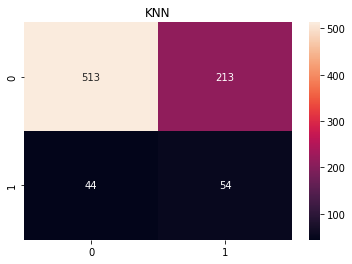

In [99]:
cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
categories = ['Zero', 'One']
sns.heatmap(cf_matrix, annot=True, fmt='').set_title('KNN')

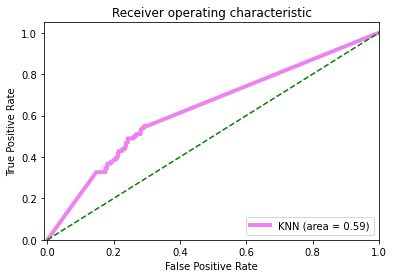

In [100]:
logit_roc_auc = roc_auc_score(y_test, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KNN.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc, linewidth =4, c = 'violet')
plt.plot([0, 1], [0, 1],'r--', c ='g')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest

In [101]:
RF = RandomForestClassifier(n_estimators = 124, min_samples_leaf = 1, min_samples_split = 6, max_depth =14, random_state=42)

parametrs = {'n_estimators': range(115, 125, 1),
            }


RF_grid = GridSearchCV(RF, parametrs, n_jobs = -1, cv=5)
RF_grid.fit(smote_X_df, smote_y_df)

RF_grid.best_params_

{'n_estimators': 124}

In [102]:
RF = RandomForestClassifier(n_estimators = 124, min_samples_leaf = 1, min_samples_split = 6, max_depth =14, random_state=42)
RF.fit(smote_X_df, smote_y_df)

cv_scores = cross_val_score(RF, X_test, y_test, cv=5, scoring='f1')
y_pred = RF.predict(X_test)
print('Accuracy {:.2f}'.format(RF.score(X_test, y_test)))
print('F1 score CV {:.2f}'.format(cv_scores.mean()))

print(classification_report(y_test, y_pred))

Accuracy 0.89
F1 score CV 0.30
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       726
           1       0.60      0.34      0.43        98

    accuracy                           0.89       824
   macro avg       0.76      0.65      0.69       824
weighted avg       0.88      0.89      0.88       824



In [103]:
y_proba = RF.predict_proba(X_test)

thresh = np.arange(0.05,1,0.05)
thresh_res = []
for thr in thresholds:
    func = np.vectorize(lambda x: 1 if x > thr else 0)
    y_pred = func(y_proba[:,1])
    thresh_res.append(roc_auc_score(y_test, y_pred))
print('optimal Threshold is ', round(thresholds[np.argmax(thresh_res)],2))

func = np.vectorize(lambda x: 1 if x > 0.29 else 0)
y_pred = func(y_proba[:,1])
print('F1 score is ', metrics.f1_score(y_test, y_pred))

logit_roc_auc = roc_auc_score(y_test, RF.predict(X_test))
logit_roc_auc

optimal Threshold is  0.29
F1 score is  0.4887218045112782


0.6532158317872604

Text(0.5, 1.0, 'Random Forest')

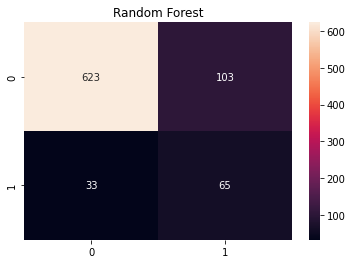

In [104]:
cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
categories = ['Zero', 'One']
sns.heatmap(cf_matrix, annot=True, fmt='').set_title('Random Forest')

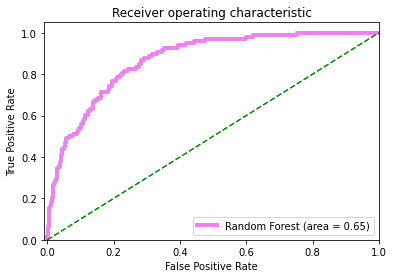

In [105]:
logit_roc_auc = roc_auc_score(y_test, RF.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc, linewidth =4, c = 'violet')
plt.plot([0, 1], [0, 1],'r--', c ='g')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Xgboost

In [106]:
Xgboost = xgb.XGBClassifier(max_depth = 22,\
        eta = 0.05, min_child_weight=1, gamma = 0.1, colsample_bytree=0.3)
parameters = {
     "max_depth"        : range(20, 25, 1),
#      "min_child_weight" : [ 1, 2],
#      "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#      "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

Xgboost_grid = GridSearchCV(Xgboost,
                    parameters, n_jobs=-1,
                    scoring="f1",
                    cv=3)

Xgboost_grid.fit(smote_X_df, smote_y_df)
Xgboost_grid.best_params_

{'max_depth': 22}

In [107]:
Xgboost = xgb.XGBClassifier(max_depth = 22,\
        eta = 0.05, min_child_weight=1, gamma = 0.1, colsample_bytree=0.3)
Xgboost.fit(smote_X_df, smote_y_df)

cv_scores_f1 = cross_val_score(Xgboost, X_test, y_test, cv=5, scoring='f1')
cv_scores_ac = cross_val_score(Xgboost, X_test, y_test, cv=5)
y_pred = Xgboost.predict(X_test)
print('Accuracy {:.2f}'.format(cv_scores_ac.mean()))
print('F1 score CV {:.2f}'.format(cv_scores_f1.mean()))

print(classification_report(y_test, y_pred))

Accuracy 0.89
F1 score CV 0.22
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       726
           1       0.60      0.29      0.39        98

    accuracy                           0.89       824
   macro avg       0.75      0.63      0.66       824
weighted avg       0.87      0.89      0.87       824



In [108]:
y_proba = Xgboost.predict_proba(X_test)

thresh = np.arange(0.05,1,0.05)
thresh_res = []
for thr in thresholds:
    func = np.vectorize(lambda x: 1 if x > thr else 0)
    y_pred = func(y_proba[:,1])
    thresh_res.append(roc_auc_score(y_test, y_pred))
print('optimal Threshold is ', round(thresholds[np.argmax(thresh_res)],2))

func = np.vectorize(lambda x: 1 if x > 0.2 else 0)
y_pred = func(y_proba[:,1])
print('F1 score is ', round(metrics.f1_score(y_test, y_pred),2))

optimal Threshold is  0.18
F1 score is  0.55


Text(0.5, 1.0, 'Xgboost')

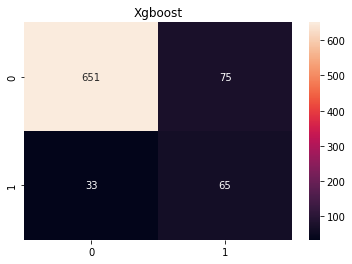

In [109]:
cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
categories = ['Zero', 'One']
sns.heatmap(cf_matrix, annot=True, fmt='').set_title('Xgboost')

### Without Smote

In [110]:
Xgboost = xgb.XGBClassifier(max_depth = 22,\
        eta = 0.05, min_child_weight=1, gamma = 0.1, colsample_bytree=0.3)
Xgboost.fit(X_train, y_train)

cv_scores_f1 = cross_val_score(Xgboost, X_test, y_test, cv=5, scoring='f1')
cv_scores_ac = cross_val_score(Xgboost, X_test, y_test, cv=5)
y_pred = Xgboost.predict(X_test)
print('Accuracy {:.2f}'.format(cv_scores_ac.mean()))
print('F1 score CV {:.2f}'.format(cv_scores_f1.mean()))

print(classification_report(y_test, y_pred))

Accuracy 0.89
F1 score CV 0.22
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       726
           1       0.74      0.17      0.28        98

    accuracy                           0.89       824
   macro avg       0.82      0.58      0.61       824
weighted avg       0.88      0.89      0.86       824



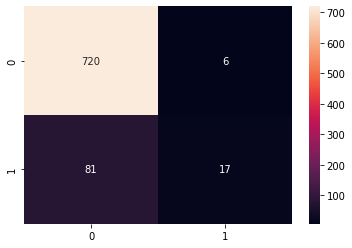

In [111]:
cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
categories = ['Zero', 'One']
sns.heatmap(cf_matrix, annot=True, fmt='')

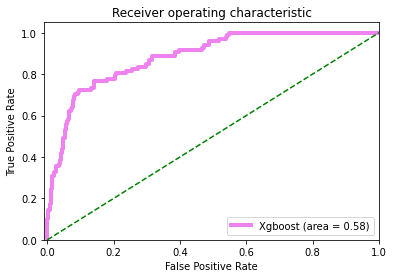

In [112]:
logit_roc_auc = roc_auc_score(y_test, Xgboost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Xgboost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Xgboost (area = %0.2f)' % logit_roc_auc, linewidth =4, c = 'violet')
plt.plot([0, 1], [0, 1],'r--', c ='g')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<Figure size 1440x720 with 0 Axes>

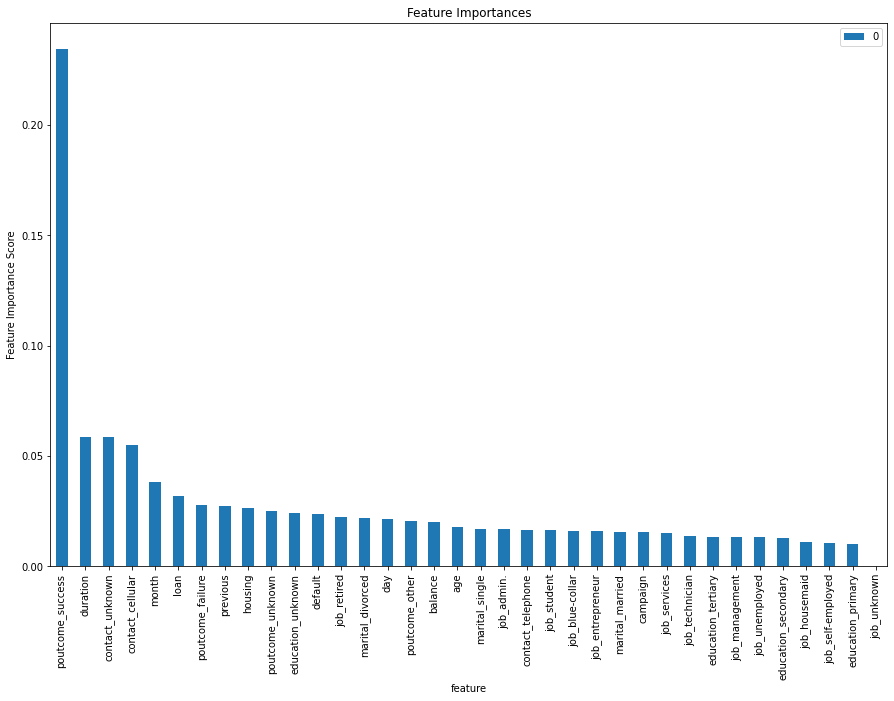

In [113]:
feat_imp = pd.Series(Xgboost.feature_importances_).sort_values(ascending=False)
feat_imp_df = pd.DataFrame(feat_imp)
feat_imp_df.reset_index(level=0, inplace=True)
features = []
for i in feat_imp_df['index'].values:
    features.append(X_train.columns[i])
feat_imp_df['feature'] = features
feat_imp_df = feat_imp_df.drop('index', axis = 1)
feat_imp_df = feat_imp_df.set_index('feature')
plt.figure(figsize=(20,10))
feat_imp_df.plot(kind='bar', title='Feature Importances', figsize=(15,10))
plt.ylabel('Feature Importance Score')
plt.show()

In [114]:
feat_imp_df

,0
feature,
poutcome_success,0.234498
duration,0.058457
contact_unknown,0.058419
contact_cellular,0.055204
month,0.038322
loan,0.031881
poutcome_failure,0.027752
previous,0.027513
housing,0.026245
